In [1]:
from file_utils import read_file_in_dir
from dataset_factory import get_datasets
from model_factory import get_model
import torch
from IPython.display import Image
import nltk

In [2]:
# Specify the experiment name
experiment_name = 'experiment_1'

In [50]:
# config_data = read_file_in_dir("./", f"{experiment_name}.json")
# coco_test, vocab, _, _, test_loader = get_datasets(config_data)
# model = get_model(config_data, vocab)
# state_dict = torch.load(f"./experiment_data/{experiment_name}/best_model.pt")
# model.load_state_dict(state_dict)

config_data = read_file_in_dir("./", f"{experiment_name}.json")
coco_test, vocab, _, _, test_loader = get_datasets(config_data)
model = get_model(config_data, vocab)
state_dict = torch.load(f"./experiment_data/{experiment_name}/latest_model.pt")
model.load_state_dict(state_dict['model'])

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
Using the saved vocab.
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


<All keys matched successfully>

In [54]:
imgs, captions, img_ids = next(iter(test_loader))
img = imgs[0].unsqueeze(0)
caption = captions[0].unsqueeze(0)
img_id = img_ids[0]

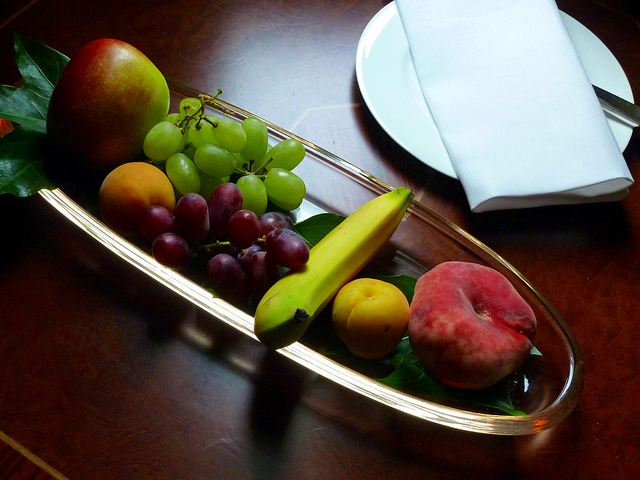

In [55]:
img_path = coco_test.loadImgs(img_id)[0]['file_name']
img_path = "./data/images/test/" + img_path
Image(filename=img_path) 

In [58]:
with torch.no_grad():
    output = model(img, caption)
    output = torch.argmax(output, dim=-1).squeeze()

target_caption = ""
for word_idx in caption.squeeze():
    word = vocab.idx2word[word_idx.item()]
    target_caption += word + ' '

print(target_caption)

predicted_caption = ""
for word_idx in output:
    word = vocab.idx2word[word_idx.item()]
    predicted_caption += word + ' '

print(predicted_caption)

<start> a delicious fruit plate in a silver bowl . the fruit includes an apple , two apricots , red and green grapes , a banana , and a peach . <end> 
<start> a close-up man man has front group bowl with <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> 


In [57]:
with torch.no_grad():
    sampled_ids = model.sample(img, 20, 0.1, False)
    for i, sampled_id in enumerate(sampled_ids):
        # Get predicted caption
        predicted_caption = ""
        for j, word_idx in enumerate(sampled_id):
            if j == 0:
                continue
            word = vocab.idx2word[word_idx.item()]
            if word == '<end>':
                break
            predicted_caption += word + ' '
        predicted_caption = nltk.tokenize.word_tokenize(predicted_caption)
        print(predicted_caption)

['a', 'close-up', 'scene', 'has', 'many', 'elephants', 'standing', 'in', 'the', 'green', 'grass']


In [59]:
model.eval()

Model1(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (